In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.linspace(-1, 1, 200)
y = 3 * X + 2 + np.random.randn(*X.shape) * 0.2

X = tf.constant(X.reshape(-1, 1), dtype=tf.float32)
y = tf.constant(y.reshape(-1, 1), dtype=tf.float32)

In [3]:
W = tf.Variable(tf.random.normal([1, 1]))
b = tf.Variable(tf.zeros([1]))

def model(X):
    return X @ W + b

def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

In [5]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

epochs = 100
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss = loss_fn(y, y_pred)
    
        gradients = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(gradients, [W, b]))

    if epoch % 10 == 0:
        print(f"Epoch {epoch:03d} | Loss: {loss.numpy():.4f} | W: {W.numpy()[0][0]:.3f} | b: {b.numpy()[0]:.3f}")


Epoch 000 | Loss: 0.0440 | W: 3.024 | b: 2.001
Epoch 010 | Loss: 0.0440 | W: 3.025 | b: 2.001
Epoch 020 | Loss: 0.0440 | W: 3.026 | b: 2.001
Epoch 030 | Loss: 0.0440 | W: 3.026 | b: 2.001
Epoch 040 | Loss: 0.0440 | W: 3.026 | b: 2.001
Epoch 050 | Loss: 0.0440 | W: 3.027 | b: 2.001
Epoch 060 | Loss: 0.0440 | W: 3.027 | b: 2.001
Epoch 070 | Loss: 0.0440 | W: 3.027 | b: 2.001
Epoch 080 | Loss: 0.0440 | W: 3.027 | b: 2.001
Epoch 090 | Loss: 0.0440 | W: 3.027 | b: 2.001


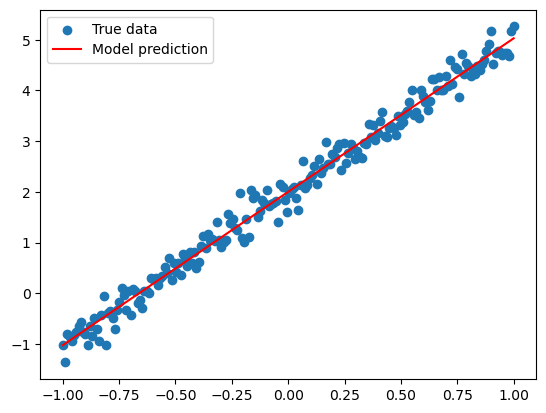

In [6]:
plt.scatter(X, y, label='True data')
plt.plot(X, model(X), color='red', label='Model prediction')
plt.legend()
plt.show()